In [4]:
# impoart lib
from scipy.io import loadmat
import numpy as np
from sklearn.cluster import *
import random
import scipy.spatial.distance as dist
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn import metrics
from sklearn.datasets import make_blobs

### For this method, the hyper parameter you need to adjust is "n_clusters" and "method" 
#### there are four methods: 'ward', 'average', 'complete', 'single'

## preprocess

In [8]:
raw = loadmat("../Wind_profiles.mat")
print(raw.keys())


dict_keys(['__header__', '__version__', '__globals__', 'INDEX', 'dir', 'horspeed', 'humidity', 'metdir', 'metspeed', 'press', 'quotes', 'rain', 'temp', 'time', 'vertspeed'])


In [10]:
### load data
num_used = 8470

## 
raw = loadmat("../wind_data.mat")
heights = raw['alt']

raw = loadmat("../Wind_profiles.mat")
rawdata = raw['horspeed']
# rawdir = raw['dir']
rawhu = raw['humidity']
# rawmet = raw['metspeed']
rawmetdir = raw['metdir']
rawpress = raw['press']
rawrain = raw['rain']
rawtemp = raw['temp']
rawtime = raw['time']
rawmetverspeed = raw['vertspeed']

### first, we sample the data for there are too many data points
# and we discard those with value nan

data = []
dir_data = []
for i in range(min(len(rawdata),used_data_idx)):
    if i in used_data_idx:
        # chech whther nan is in the data
        flag = True
        for j in rawdata[i]:
            if math.isnan(j):
                flag = False
                continue
        
        ## if not in, add to sample
        if flag and max(rawdata[i]) > 3:
            cur_dir = sum(rawdir[i])/9
            data.append(rawdata[i])
            dir_data.append(cur_dir)

data = np.array(data)
dir_data = np.array(dir_data)
print(np.shape(data))
print(np.shape(dir_data))


(6392, 9)
(6392,)


In [3]:
## Then, we need to normalize the data 
preprocessed = []
normalized = np.zeros((len(data),len(data[0])))
for i in range(len(data)):
    normalized[i] = data[i]/data[i][0]
    cur_pred = np.append(normalized[i],data[i][0])
    cur_pred = np.append(cur_pred,dir_data[i])
    # print(len(cur_pred))
    preprocessed.append(cur_pred)
preprocessed = np.array(preprocessed)
print(np.shape(preprocessed))
normalized = preprocessed
X = preprocessed

(6309, 11)


After the above cell, first processed (normalized) data is in variable: data 

## models (AgglomerativeClustering)

In [4]:
X = normalized
score_metrics = {}
for method in ['ward', 'average', 'complete', 'single']:
    cur_scores = []
    for n_clusters in range(2,20):
        model = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
        model.fit(X)
        labels = model.labels_
        used_score = metrics.silhouette_score(X, labels, metric='sqeuclidean')
        cur_scores.append(used_score)
        print("using number of clusters: ", n_clusters, "\nusing method: ", method)
        print("results:")
        print("Silhouette Coefficient: ",metrics.silhouette_score(X, labels, metric='sqeuclidean'))
        print("calinski_harabasz_score: ",used_score,"\n")
        
    score_metrics[method] = cur_scores

using number of clusters:  2 
using method:  ward
results:
Silhouette Coefficient:  0.9091961060285011
calinski_harabasz_score:  0.9091961060285011 

using number of clusters:  3 
using method:  ward
results:
Silhouette Coefficient:  0.6751253042292239
calinski_harabasz_score:  0.6751253042292239 

using number of clusters:  4 
using method:  ward
results:
Silhouette Coefficient:  0.720419729533793
calinski_harabasz_score:  0.720419729533793 

using number of clusters:  5 
using method:  ward
results:
Silhouette Coefficient:  0.7075910098116948
calinski_harabasz_score:  0.7075910098116948 

using number of clusters:  6 
using method:  ward
results:
Silhouette Coefficient:  0.6657893218522721
calinski_harabasz_score:  0.6657893218522721 

using number of clusters:  7 
using method:  ward
results:
Silhouette Coefficient:  0.6893753026448797
calinski_harabasz_score:  0.6893753026448797 

using number of clusters:  8 
using method:  ward
results:
Silhouette Coefficient:  0.6310841706442486

using number of clusters:  2 
using method:  single
results:
Silhouette Coefficient:  0.34354328774948323
calinski_harabasz_score:  0.34354328774948323 

using number of clusters:  3 
using method:  single
results:
Silhouette Coefficient:  -0.25535268676707745
calinski_harabasz_score:  -0.25535268676707745 

using number of clusters:  4 
using method:  single
results:
Silhouette Coefficient:  -0.354567949274751
calinski_harabasz_score:  -0.354567949274751 

using number of clusters:  5 
using method:  single
results:
Silhouette Coefficient:  -0.3546848804523601
calinski_harabasz_score:  -0.3546848804523601 

using number of clusters:  6 
using method:  single
results:
Silhouette Coefficient:  -0.4143908730840962
calinski_harabasz_score:  -0.4143908730840962 

using number of clusters:  7 
using method:  single
results:
Silhouette Coefficient:  -0.460744719887893
calinski_harabasz_score:  -0.460744719887893 

using number of clusters:  8 
using method:  single
results:
Silhouette Coeffi

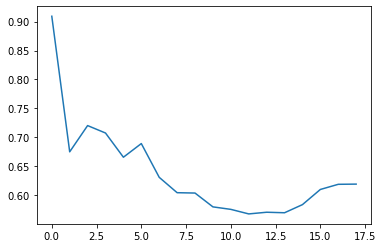

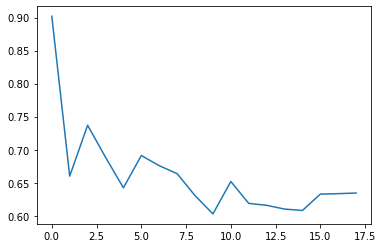

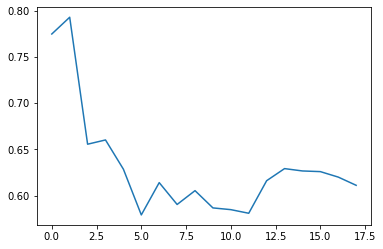

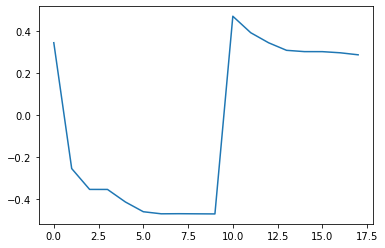

In [5]:
plt.plot(score_metrics['ward'])
plt.figure()
plt.plot(score_metrics['average'])
plt.figure()
plt.plot(score_metrics['complete'])
plt.figure()
plt.plot(score_metrics['single'])

In [6]:
## Therefore, we can chose the n_cluster as 5 we can visualize some of the data
model = AgglomerativeClustering(linkage='ward', n_clusters=20)
model.fit(X)
label = model.labels_

## results

In [3]:
## show the res
# we define a fun to revael very class of result

## para:
# @max_num : shown num
# @the label
# @the class you want to look at
# @raw data
def show_res(max_num,label,cur_label,preprocessed_data):
    global heights
    global data
    U10 = preprocessed_data[:,9]
    dir_data = preprocessed_data[:,10]
    preprocessed_data = preprocessed_data[:,:9]
    cur_num = 0
    for i in range(len(label)):
        if label[i] == cur_label:
            cur_num += 1
            # plt.subplot(121)
            plt.figure()
            plt.xlim(7)
            plt.plot(preprocessed_data[i],heights[0])
            plt.ylabel('height')
            plt.xlabel('U(h)/U(10)')
            # plt.subplot(122)
            #plt.plot(data[i],heights[0])
            
            if cur_num >= max_num:
                break
    plt.figure()
    plt.hist(U10)
    plt.figure()
    plt.hist(dir_data)
    # print(cur_num)
    return cur_num

the left picture is what the classifier receives and the right one is actual data.

In [2]:
n_clusters = 20
nums = []
for i in range(n_clusters):
    plt.figure()
    cur_num = show_res(50000,label,i,normalized)
    nums.append(cur_num)
#plt.hist(data, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# print(nums)

plt.figure()
plt.hist(label)


NameError: name 'plt' is not defined